<b>Cointegration</b>
</n>

To test if stock pairs are cointegrated and additional information

In [4]:
pip install cointanalysis

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [15]:


pip install pandas-datareader

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 8.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 8.4 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.3/241.3 KB 4.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 960.8/960.8 KB 10.3 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt
import numpy as np
from cointanalysis import CointAnalysis

In [18]:
#fetch function
def fetch_stocks(ticker):
    return DataReader(ticker,'yahoo','2018-01-01','2021-12-31')['Adj Close']

In [22]:
spy = fetch_stocks('SPY')
voo = fetch_stocks('VOO')
aapl = fetch_stocks('AAPL')

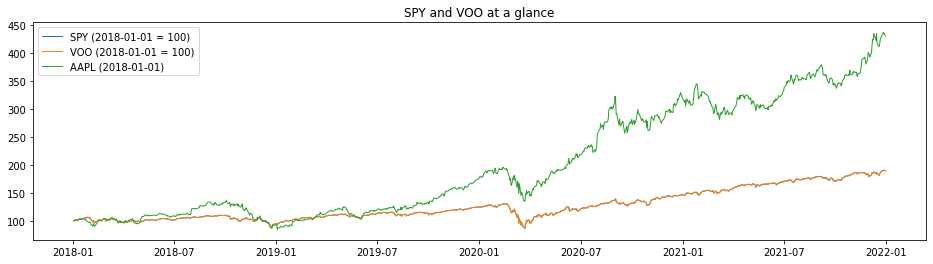

In [23]:
#general 
plt.figure(figsize=(16, 4))

plt.title('SPY and VOO at a glance')
spy_perc = 100 * spy / spy[0]
voo_perc = 100 * voo / voo[0]
aapl_perc = 100*aapl/aapl[0]
plt.plot(spy_perc, label='SPY (2018-01-01 = 100)', linewidth=1)
plt.plot(voo_perc, label='VOO (2018-01-01 = 100)', linewidth=1)
plt.plot(aapl_perc, label='AAPL (2018-01-01)', linewidth = 1)

plt.legend()
plt.show()

In [24]:
#cointegration test
coint = CointAnalysis()

X = np.stack([spy, voo], axis=1)

coint.test(X).pvalue_

0.004708091521107977

In [29]:
print("p-value of " + str(0.00471*100)) #p value<0.05

p-value of 0.471


In [31]:
coint = CointAnalysis()

Y = np.stack([spy, aapl], axis=1)

coint.test(Y).pvalue_

print("p-value of " + str(coint.test(Y).pvalue_*100))

p-value of 25.464493558916057


In [30]:
#p value > 0.05

In [32]:
#Getting Spread
coint.fit(X)
print(f'coef: {coint.coef_}')
print(f'mean: {coint.mean_}')
print(f'std: {coint.std_}')


coef: [-0.92123607  1.        ]
mean: -1.0329011063039388
std: 0.12539877633657068


In [33]:
coint.fit(Y)
print(f'coef: {coint.coef_}')
print(f'mean: {coint.mean_}')
print(f'std: {coint.std_}')

coef: [-0.58130982  1.        ]
mean: -100.38156337153727
std: 11.268148896161293


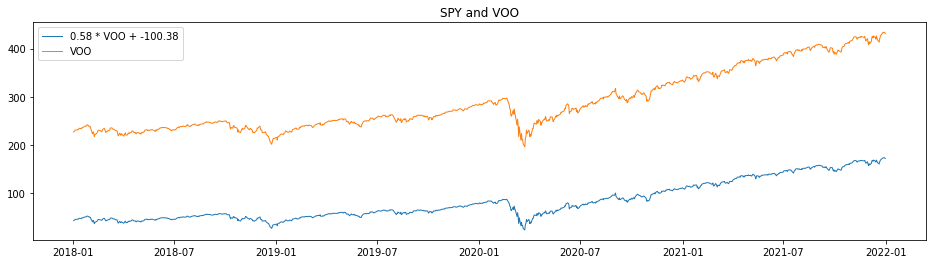

In [38]:
plt.figure(figsize=(16, 4))

spy_adj = (-coint.coef_[0]) * spy + coint.mean_

plt.title('SPY and VOO')
plt.plot(spy_adj, label=f'{-coint.coef_[0]:.2f} * VOO + {coint.mean_:.2f}', linewidth=1)
plt.plot(voo, label='VOO', linewidth=1)

plt.legend()
plt.show()

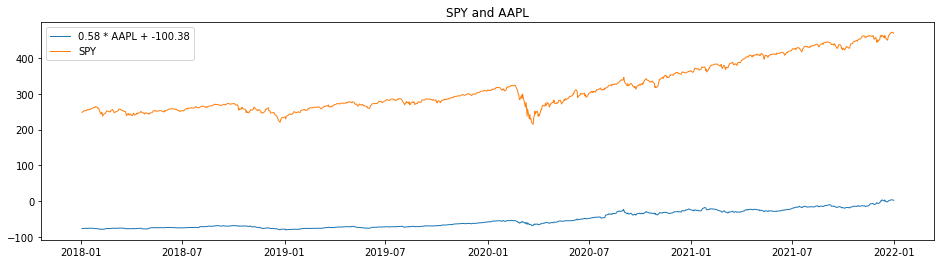

In [39]:
plt.figure(figsize=(16, 4))

aapl_adj = (-coint.coef_[0]) * aapl + coint.mean_

plt.title('SPY and AAPL')
plt.plot(aapl_adj, label=f'{-coint.coef_[0]:.2f} * AAPL + {coint.mean_:.2f}', linewidth=1)
plt.plot(spy, label='SPY', linewidth=1)

plt.legend()
plt.show()

In [40]:
spread = coint.transform(X)

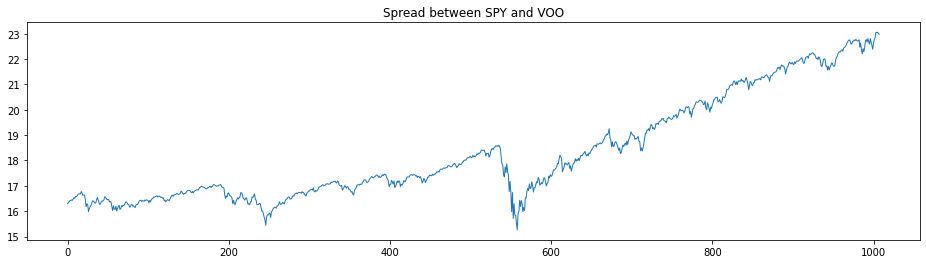

In [42]:
plt.figure(figsize=(16, 4))
plt.title('Spread between SPY and VOO')
plt.plot(spread, linewidth=1)
plt.show()